## Loading all packages

In [19]:
# Reload all modules
%load_ext autoreload
%autoreload 2

# Other package imports
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# User packages.
from features.FitnessAnalysis import MultipleFitnessAnalysis
from features.RandomWalkAnalysis import MultipleRandomWalkAnalysis
from features.LandscapeAnalysis import LandscapeAnalysis

from cases.MW_setup import MW3, MW7
import numpy as np
from optimisation.model.population import Population
from sampling.RandomWalk import RandomWalk
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Evaluating populations

In [20]:
problem = MW7(n_dim=5)  # use default dimensionality.
n_variables = problem.dim

# Experimental setup of Alsouly
# n_points = n_variables * 10**3
# n_points = n_variables * 2 * 10**3
# n_points = 3000
# n_points = 5
neighbourhood_size = 2 * n_variables + 1
num_steps = int(n_variables / neighbourhood_size * 10**3)
# num_steps = 10
step_size = 0.2  # 2% of the range of the instance domain

# Bounds of the decision variables.
x_lower = problem.lb
x_upper = problem.ub
bounds = np.vstack((x_lower, x_upper))

num_samples = 150

# Run feature eval multiple times.
pops = []
rw = RandomWalk(bounds, num_steps, step_size)
for ctr in range(num_samples):
    # Simulate RW
    walk = rw._do(seed=ctr)

    # Generate neighbours.
    new_walk = rw.generate_neighbours_for_walk(walk, neighbourhood_size)

    pop = Population(problem, n_individuals=num_steps)
    pop.evaluate(walk)
    print(
        "Evaluated rank and crowding for RW population {} of {}".format(
            ctr + 1, num_samples
        )
    )
    pops.append(pop)

# Saving results to pickle file.
with open("data/{}_d2_pop_data.pkl".format(problem.problem_name), "wb") as outp:
    pickle.dump(pops, outp, -1)

Evaluated rank and crowding for RW population 1 of 150
Evaluated rank and crowding for RW population 2 of 150
Evaluated rank and crowding for RW population 3 of 150
Evaluated rank and crowding for RW population 4 of 150
Evaluated rank and crowding for RW population 5 of 150
Evaluated rank and crowding for RW population 6 of 150
Evaluated rank and crowding for RW population 7 of 150
Evaluated rank and crowding for RW population 8 of 150
Evaluated rank and crowding for RW population 9 of 150
Evaluated rank and crowding for RW population 10 of 150
Evaluated rank and crowding for RW population 11 of 150
Evaluated rank and crowding for RW population 12 of 150
Evaluated rank and crowding for RW population 13 of 150
Evaluated rank and crowding for RW population 14 of 150
Evaluated rank and crowding for RW population 15 of 150
Evaluated rank and crowding for RW population 16 of 150
Evaluated rank and crowding for RW population 17 of 150
Evaluated rank and crowding for RW population 18 of 150
E

## Evaluating features over all populations

In [24]:
# Reload all modules
%load_ext autoreload
%autoreload 2

# Loading results from pickle file.
with open("data/MW7_d2_pop_data.pkl", "rb") as inp:
    pops = pickle.load(inp)


# Global features.
global_features = MultipleFitnessAnalysis(pops)
global_features.eval_features_for_all_populations()

# Random walk features.
rw_features = MultipleRandomWalkAnalysis(pops)
rw_features.eval_features_for_all_populations()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Evaluated MultipleFitnessAnalysis features for population 1 of 150
Evaluated MultipleFitnessAnalysis features for population 2 of 150
Evaluated MultipleFitnessAnalysis features for population 3 of 150
Evaluated MultipleFitnessAnalysis features for population 4 of 150
Evaluated MultipleFitnessAnalysis features for population 5 of 150
Evaluated MultipleFitnessAnalysis features for population 6 of 150
Evaluated MultipleFitnessAnalysis features for population 7 of 150
Evaluated MultipleFitnessAnalysis features for population 8 of 150
Evaluated MultipleFitnessAnalysis features for population 9 of 150
Evaluated MultipleFitnessAnalysis features for population 10 of 150
Evaluated MultipleFitnessAnalysis features for population 11 of 150
Evaluated MultipleFitnessAnalysis features for population 12 of 150
Evaluated MultipleFitnessAnalysis features for population 13 of 150
Evaluated MultipleFitnessAnalysis fea

## Plotting decision variables, objectives

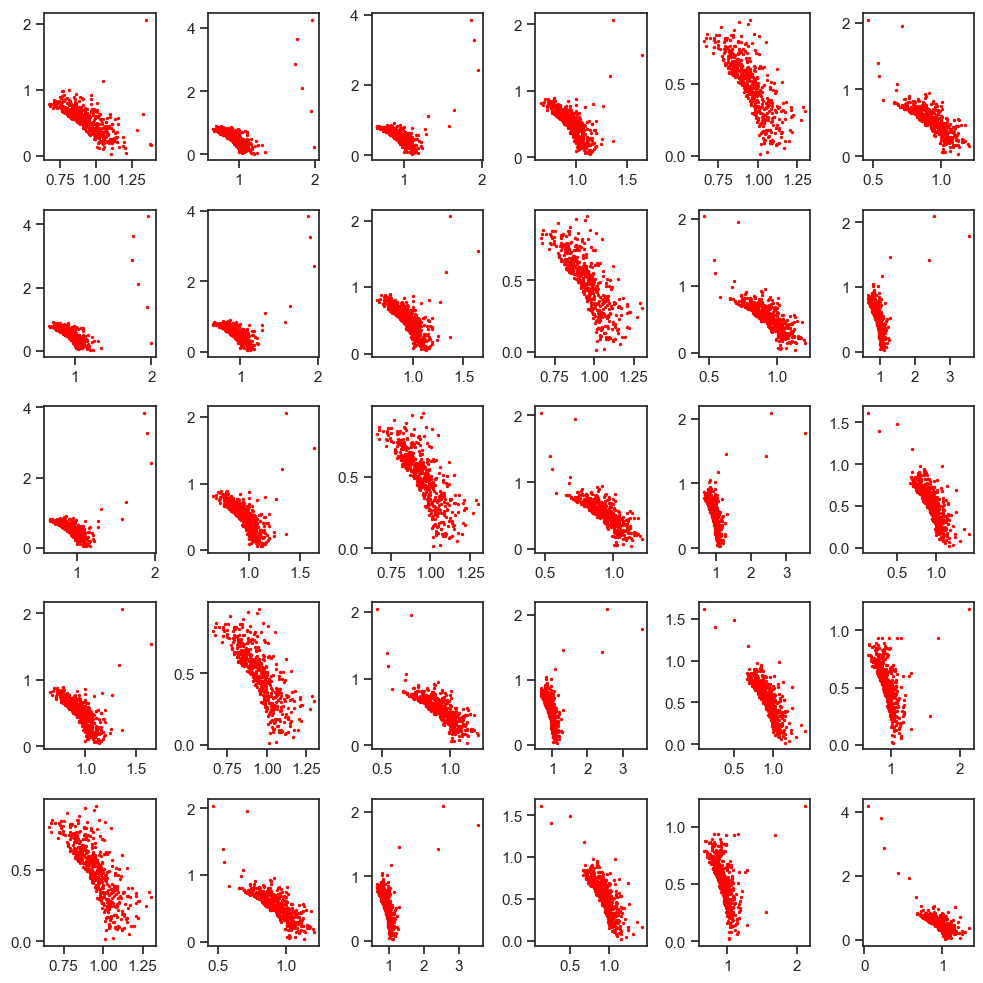

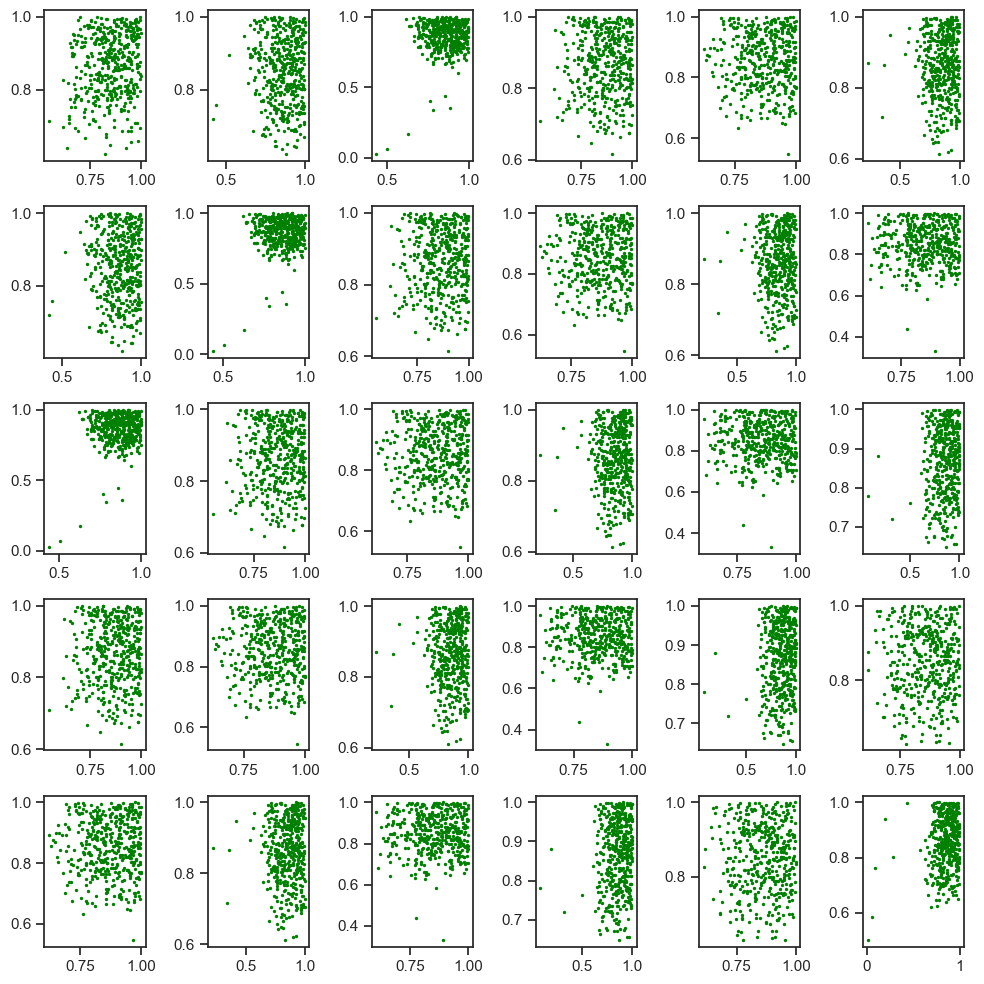

d:\richa\anaconda3\envs\thesis_env_windows\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


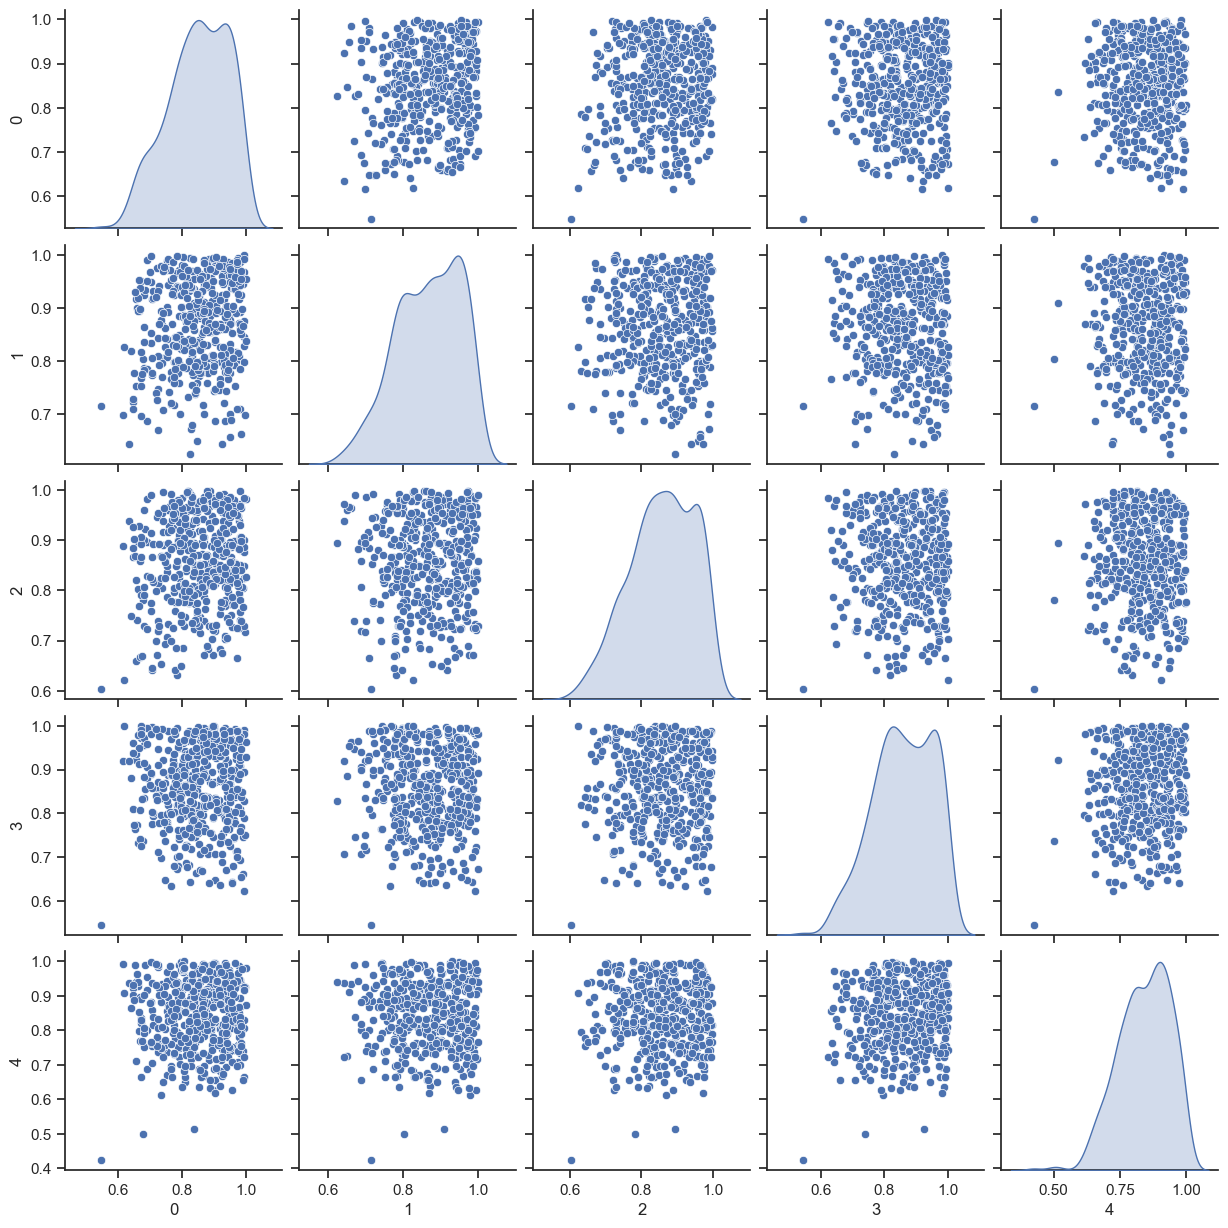

In [25]:
# Plot objectives
# Create a 5x6 grid of subplots
fig, ax = plt.subplots(5, 6, figsize=(10, 10))
for i in range(5):
    for j in range(6):
        pop = pops[i + j]

        obj = pop.extract_obj()

        # Plot the objectives on the current subplot.
        ax[i, j].scatter(obj[:, 0], obj[:, 1], s=2, color="red")

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

# Plot decisions
# Create a 5x6 grid of subplots
fig, ax = plt.subplots(5, 6, figsize=(10, 10))
for i in range(5):
    for j in range(6):
        pop = pops[i + j]

        var = pop.extract_var()

        # Plot the varision vars on the current subplot.
        ax[i, j].scatter(var[:, 0], var[:, 1], s=2, color="green")

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()


# %%
def scatterplot_matrix(data):
    """
    Create a scatterplot matrix for a numpy array.

    Parameters:
    - data: numpy array (n x n) containing the data for the scatterplot matrix.

    Returns:
    - None (displays the scatterplot matrix).
    """
    # Convert the numpy array to a Pandas DataFrame for Seaborn
    import pandas as pd

    df = pd.DataFrame(data)

    # Create the scatterplot matrix using Seaborn
    sns.set(style="ticks")
    sns.pairplot(df, diag_kind="kde", markers="o")

    # Display the plot
    plt.show()


scatterplot_matrix(pops[0].extract_var())


# %%

# Combine all features.
landscape = LandscapeAnalysis(global_features, rw_features)
landscape.extract_feature_arrays()
landscape.aggregate_features(YJ_transform=False)
landscape.extract_features_vector()
landscape.map_features_to_instance_space()

In [26]:
# Saving results to pickle file.
with open("data/MW3_landscape_data.pkl", "wb") as outp:
    pickle.dump(landscape, outp, -1)

# Apply YJ transformation
# landscape.aggregate_features(True)

aggregated_table = landscape.make_aggregated_feature_table()
unaggregated_global_table = landscape.make_unaggregated_global_feature_table()
unaggregated_rw_table = landscape.make_unaggregated_rw_feature_table()

alsouly_table = landscape.extract_experimental_results()

# landscape.aggregate_features(True)
# aggregated_YJ_table = landscape.make_aggregated_feature_table()


comp_table = pd.concat(
    [
        alsouly_table.loc[:, alsouly_table.columns != "feature_D"],
        aggregated_table,
        # aggregated_YJ_table,
    ]
)

# Reset the index if needed
comp_table.reset_index(drop=True, inplace=True)
comp_table = comp_table.transpose()
print(comp_table)


                                      0         1
Instances              MW7_experimental  MW7_rrut
fsr                            0.415025  0.418767
cpo_upo_n                        0.9198  0.658027
corr_obj                      -0.411241 -0.403878
corr_cf                        0.111169 -0.442011
piz_ob_min                      0.16642  0.161043
ps_dist_iqr_mean                  0.141  0.120997
dist_c_corr                    0.682653  0.621056
skew_rnge                      2.106494   2.64615
min_cv                              0.0       0.0
f_mdl_r2                       0.166784  0.097394
cv_mdl_r2                      0.328725  0.354888
cv_range_coeff                 1.427122  1.728595
dist_f_dist_x_avg_rws          1.066378  1.027143
dist_c_dist_x_avg_rws          0.667039  0.709243
bhv_avg_rws                    0.158874  0.272357
